# Modelación y Simulación
## Laboratorio 3
**Integrantes:**
- Gustavo González
- Diego Leiva
- Pablo Orellana
---

## Ejercicio 1 - Teoría

- **¿Qué es el método de Runge-Kutta y cómo aproxima las soluciones a las EDO?**
    - El método de Runge-Kutta es una familia de métodos iterativos utilizados para aproximar las soluciones de ecuaciones diferenciales ordinarias. A diferencia del método de Euler, que utiliza una aproximación lineal basada en la derivada en un solo punto, los métodos de Runge-Kutta utilizan varias evaluaciones de la función en diferentes puntos dentro de un intervalo para obtener una estimación más precisa de la solución. El método más común de esta familia es el de cuarto orden, conocido como RK4, que combina cuatro evaluaciones de la función para proporcionar una aproximación precisa y eficiente.

- - -

- **¿Cuáles son las ventajas y desventajas del método de Runge-Kutta en comparación con otros métodos numéricos para EDO? (Mencione al menos 2 ventajas y 2 desventajas)**
    - **Ventajas:**
        - Precisión: Los métodos de Runge-Kutta, especialmente los de orden superior como el RK4, son muy precisos y eficientes para resolver EDO, proporcionando mejores aproximaciones que métodos más simples como el de Euler (Butcher, 2008).

        - Estabilidad: Los métodos de Runge-Kutta suelen ser más estables en comparación con métodos como el de Euler, lo que es particularmente útil en problemas donde la estabilidad es crucial (Press et al., 2007).
    - **Desventajas:**
        - Complejidad computacional: Los métodos de Runge-Kutta requieren más evaluaciones de la función por paso que métodos más simples, lo que aumenta el costo computacional (Chapra & Canale, 2010).

- - - 

- **¿Cómo se diferencia el método de Euler y el método de Runge-Kutta?**
    - El método de Euler es un método de primer orden para resolver EDO que utiliza una aproximación lineal basada en la derivada en un solo punto. Es simple y fácil de implementar pero puede ser impreciso y inestable para pasos grandes. En contraste, los métodos de Runge-Kutta, como el RK4, son métodos de orden superior que utilizan múltiples evaluaciones de la función en diferentes puntos dentro del intervalo para obtener una aproximación más precisa y estable. Esto hace que los métodos de Runge-Kutta sean más adecuados para problemas que requieren alta precisión y estabilidad.

- - -
      
- **¿Cómo se puede aplicar el método de Euler y el método de Runge-Kutta modelos epidemiológicos y modelos de depredador-presa?**
    - En modelos epidemiológicos y modelos de depredador-presa, las ecuaciones diferenciales ordinarias describen la dinámica de las poblaciones a lo largo del tiempo. El método de Euler puede ser utilizado para obtener una aproximación rápida y sencilla de estas dinámicas, aunque puede ser impreciso para pasos grandes. Por otro lado, el método de Runge-Kutta, especialmente el RK4, proporciona una aproximación más precisa y estable, lo que es crucial para capturar las complejas interacciones entre especies o entre susceptibles, infectados y recuperados en modelos epidemiológicos (Kermack & McKendrick, 1927; Lotka, 1925).
 
- - -

### Referencias

- Butcher, J. C. (2008). Numerical Methods for Ordinary Differential Equations (2nd ed.). John Wiley & Sons.

- Chapra, S. C., & Canale, R. P. (2010). Numerical Methods for Engineers (6th ed.). McGraw-Hill.

- Kermack, W. O., & McKendrick, A. G. (1927). A Contribution to the Mathematical Theory of Epidemics. Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences, 115(772), 700–721.

- Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge University Press.

## Ejercicio 2 - Método de Runge-Kutta

In [1]:
import math
import matplotlib.pyplot as plt

### Runge-Kutta Model  
Here we define the functions to solve a differential equation using the Runge-Kutta method

In [2]:
def rk4_step(t_i, y_i, dt, f):
    """this function takes a single step using the Runge-Kutta 4th order method 

    Args:
        t_i : The current time
        y_i : the current value of the function
        dt : the time step
        f : the function to be integrated

    Returns:
        the value of the function at the next time step
    """
    k1 = f(t_i, y_i)
    k2 = f(t_i + dt/2, y_i + k1*dt/2)
    k3 = f(t_i + dt/2, y_i + k2*dt/2)
    k4 = f(t_i + dt, y_i + k3*dt)
    return y_i + dt/6*(k1 + 2*k2 + 2*k3 + k4)


def solve(t_0: float, y_0: float, t_final: float, dt: float, f: callable):
    """_summary_

    Args:
        t_0 (float): _description_
        y_0 (float): _description_
        t_final (float): _description_
        dt (float): _description_
        f (callable): _description_
    """
    # computing result
    ts = [t_0]
    ys = [y_0]

    y = y_0    
    t = t_0

    while t < t_final:
        # Solving with Runge-Kutta
        y = rk4_step(t, y, dt, f)
        # Increasing t
        t += dt

        # Appending results
        ts.append(t)
        ys.append(y)

    return ts, ys


def find_closest(ys, xs, x):
    """ This function finds the closest value to x in the list xs and returns the corresponding value in ys

    Args:
        xs (list): xs is the list of x values with size n
        ys (list): ys is the list of y values with size n
        x (float): x is the value to be found

    Returns:
        the value of the function at the closest value to x
    """
    # Finding the closest value to x
    closest = min(xs, key=lambda x0: abs(x0 - x))
    # Returning the corresponding value
    return ys[xs.index(closest)]


def plot_graph(xs, ys):
    """We plot the graph of the function

    Args:
        xs (list): xs is the list of x values with size n
        ys (list): ys is the list of y values with size n
    """
    plt.plot(ys, xs, color='red', marker='o', linewidth=0.0, label='RK4')    
    plt.legend()
    plt.show()

### Ejercicio 2.1 Crecimiento Poblacional

In [3]:
# Constants for the model
R = 0.1
K = 1000

# Parameters for solving the model
P0 = 10  # initial value for p 
T0 = 0  # initial time
H = 0.1  # time step
T = 20  # final time

def f(t,p):
    global R, K
    return R*p*(1 - p/K)    

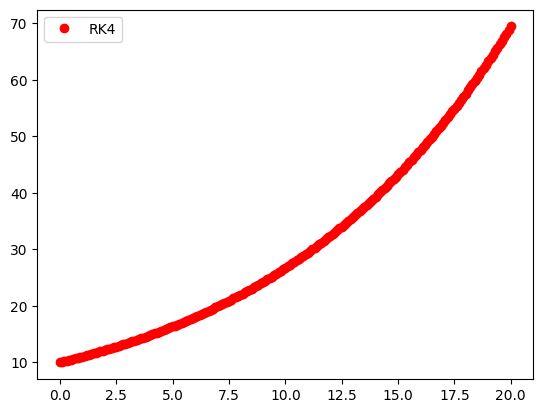

In [4]:
p_points, t_points = solve(T0, P0, T, H, f)
plot_graph(t_points, p_points)

In [5]:
population = find_closest(t_points, p_points, 20)
print(f"Population at time 20 is approximately: {population:.2f}")

Population at time 20 is approximately: 69.45


### Ejercicio 2.2 - Depredador - Presa

In [6]:
def rk4_step_system(t_i, y_i, z_i, dt, f1, f2):
    """
    This function takes a single step using the Runge-Kutta 4th order method for a system of two equations.

    Args:
        t_i: The current time
        y_i: the current value of the first function
        z_i: the current value of the second function
        dt: the time step
        f1: the first function to be integrated
        f2: the second function to be integrated

    Returns:
        The values of the functions at the next time step
    """
    k1_y = f1(t_i, y_i, z_i)
    k1_z = f2(t_i, y_i, z_i)
    
    k2_y = f1(t_i + dt/2, y_i + k1_y*dt/2, z_i + k1_z*dt/2)
    k2_z = f2(t_i + dt/2, y_i + k1_y*dt/2, z_i + k1_z*dt/2)
    
    k3_y = f1(t_i + dt/2, y_i + k2_y*dt/2, z_i + k2_z*dt/2)
    k3_z = f2(t_i + dt/2, y_i + k2_y*dt/2, z_i + k2_z*dt/2)
    
    k4_y = f1(t_i + dt, y_i + k3_y*dt, z_i + k3_z*dt)
    k4_z = f2(t_i + dt, y_i + k3_y*dt, z_i + k3_z*dt)
    
    y_next = y_i + dt/6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    z_next = z_i + dt/6 * (k1_z + 2*k2_z + 2*k3_z + k4_z)
    
    return y_next, z_next

def solve_system(t_0, y_0, z_0, T, dt, f1, f2):
    """
    Solves a system of two differential equations using the 4th order Runge-Kutta method.

    Args:
        t_0: Initial time
        y_0: Initial value for the first function
        z_0: Initial value for the second function
        T: Final time
        dt: Time step
        f1: The first function to be integrated
        f2: The second function to be integrated

    Returns:
        A tuple containing two lists: the times and the solutions for each function
    """
    ts = [t_0]
    ys = [y_0]
    zs = [z_0]
    
    t = t_0
    y = y_0
    z = z_0
    
    while t < T:
        y, z = rk4_step_system(t, y, z, dt, f1, f2)
        t += dt
        ts.append(t)
        ys.append(y)
        zs.append(z)
        
    return ts, ys, zs


def plot_multi_graph(ts, ys, zs):
    """
    Plots the graphs of the functions over time.

    Args:
        ts: List of time values
        ys: List of values for the first function
        zs: List of values for the second function
    """
    plt.plot(ts, ys, label='Prey Population (R)')
    plt.plot(ts, zs, label='Predator Population (P)')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

In [7]:
# Constants for the model
ALPHA = 0.1     # Natural prey growth rate
BETA = 0.02     # Predation rate
DELTA = 0.01    # Predator growth rate per prey eaten
GAMMA = 0.1     # Predator death rate

# Parameters for solving the model
r0 = 40  # Initial prey population
p0 = 9   # Initial predator population
t0 = 0   # Initial time
h = 0.1 # Time step
t = 50 # Final time

# Predator-prey model Lotka-Volterra equations
def prey_growth(t, r, p):
    # Prey growth rate
    return ALPHA * r - BETA * r * p

def predator_growth(t, r, p):
    # Predator growth rate
    return DELTA * r * p - GAMMA * p

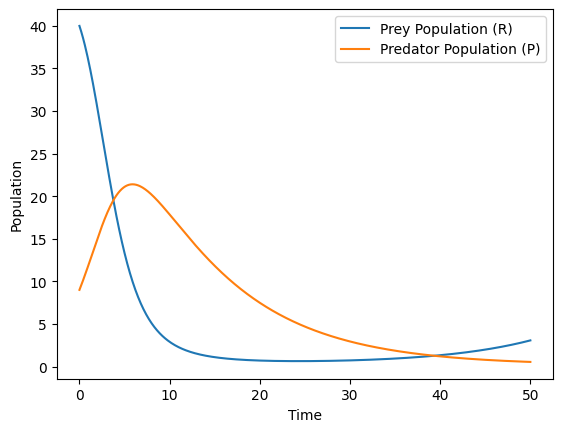

In [8]:
# Solving the system
t_points, r_points, p_points = solve_system(t0, r0, p0, t, h, prey_growth, predator_growth)
plot_multi_graph(t_points, r_points, p_points)

In [9]:
# To find the population at T=50
prey_at_t_final = r_points[-1]
predator_at_t_final = p_points[-1]
print(f"Estimated prey population at T=50: {prey_at_t_final:.2f}")
print(f"Estimated predator population at T=50: {predator_at_t_final:.2f}")

Estimated prey population at T=50: 3.07
Estimated predator population at T=50: 0.54
